## Setup

In [ ]:
!pip install open3d

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Mess around

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import open3d as o3d
import torch

In [ ]:
right_image = mpimg.imread('/content/right.png')

In [ ]:
left_image = mpimg.imread('/content/left.png')

In [ ]:
print(left_image.shape)

(370, 1224, 3)


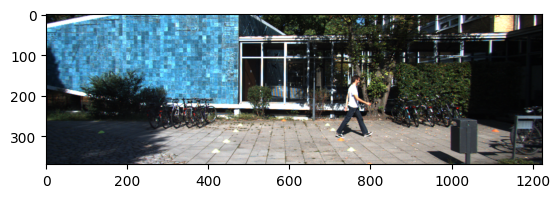

In [ ]:
plt.imshow(left_image)

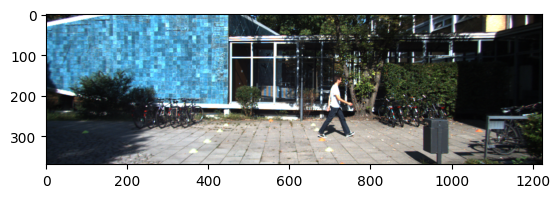

In [ ]:
plt.imshow(right_image)

In [ ]:
# Load binary point cloud
bin_pcd = np.fromfile("/content/000000.bin", dtype=np.float32)

# Reshape and drop reflection values
points = bin_pcd.reshape((-1, 4))[:, 0:3]

# Convert to Open3D point cloud
o3d_pcd = o3d.geometry.PointCloud(o3d.utility.Vector3dVector(points))

In [ ]:
o3d.visualization.draw_plotly([o3d_pcd], front = [0.0,0.0,0.0], lookat=[19.321, 0.836, -1.995])

/usr/local/lib/python3.10/dist-packages/open3d/visualization/draw_plotly.py:167: RuntimeWarning:

invalid value encountered in double_scalars



In [ ]:
print(points.shape)

(19030, 3)


In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

## More messing around with APIs

In [ ]:
import torch
import torch.nn as nn
from torchvision.models import resnet50

class ImageFeatureExtractor(nn.Module):
    def __init__(self):
        super(ImageFeatureExtractor, self).__init__()
        base_model = resnet50(pretrained=True)
        self.base_model = nn.Sequential(*list(base_model.children())[:-1])

    def forward(self, x):
        return self.base_model(x)

In [ ]:
image_feature_extractor = ImageFeatureExtractor()
left_img_features = image_feature_extractor(left_image)
right_img_features = image_feature_extractor(right_image)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 92.3MB/s]


TypeError: ignored

In [ ]:
import torch
import torchvision.models as models
from torchvision import transforms
from PIL import Image

# Load the pretrained ResNet model and remove the last layer
resnet = models.resnet50(pretrained=True)
modules = list(resnet.children())[:-1] # Remove the last layer
resnet = nn.Sequential(*modules)
resnet.eval()

img = Image.open('/content/left.png')

preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

input_tensor = preprocess(img)
input_batch = input_tensor.unsqueeze(0)

if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    resnet.to('cuda')

with torch.no_grad():
    features = resnet(input_batch)

In [ ]:
print(features.shape)

torch.Size([1, 2048, 1, 1])


In [ ]:
print(left_features.shape)

## Some more

In [ ]:
!pip3 install openmim
!mim install mmengine
!mim install "mmcv>=2.0.0rc4,<2.1.0"
!mim install "mmdet>=3.0.0,<3.1.0"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 kB 5.8 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.openmmlab.com/mmcv/dist/cu118/torch2.0.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.3/374.3 kB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.9/200.9 kB 24.2 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.openmmlab.com/mmcv/dist/cu118/torch2.0.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.4/74.4 MB 19.8 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.openmmlab.com/mmcv/dist/cu118/torch2.0.0/index.html
     ━━━━━━━━━━━━━━━

In [ ]:
!git clone https://github.com/open-mmlab/mmdetection3d.git -b dev-1.x
%cd mmdetection3d
!pip install -e .

Cloning into 'mmdetection3d'...
remote: Enumerating objects: 20501, done.
remote: Counting objects: 100% (6004/6004), done.
remote: Compressing objects: 100% (1074/1074), done.
remote: Total 20501 (delta 5332), reused 4979 (delta 4928), pack-reused 14497
Receiving objects: 100% (20501/20501), 20.23 MiB | 21.42 MiB/s, done.
Resolving deltas: 100% (14585/14585), done.
/content/mmdetection3d
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/mmdetection3d
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 312.9/312.9 kB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 420.5/420.5 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 681.5/681.5 kB 63.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.8/57.8 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 11.9 MB/s eta 0:00:00
  Preparing metadata (se

In [ ]:
import mmdet3d
print(mmdet3d.__version__)

1.1.1


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import torch
import torch.nn as nn
from mmdet3d.apis import init_model, inference_detector, train_detector
import struct
from open3d import *

ImportError: ignored

In [ ]:
config_file = '/content/mmdetection3d/configs/pointpillars/pointpillars_hv_secfpn_8xb6-160e_kitti-3d-car.py' # Path to the config file

# Build the model from a config file (untrained)
model = init_model(config_file, None, device='cuda:0')

/content/mmdetection/mmdetection3d/mmdet3d/models/dense_heads/anchor3d_head.py:94: UserWarning: dir_offset and dir_limit_offset will be depressed and be incorporated into box coder in the future
  warnings.warn(


In [ ]:
print(model)

VoxelNet(
  (data_preprocessor): Det3DDataPreprocessor(
    (voxel_layer): VoxelizationByGridShape(voxel_size=[0.16, 0.16, 4], grid_shape=[432, 496, 1], point_cloud_range=[0, -39.68, -3, 69.12, 39.68, 1], max_num_points=32, max_voxels=(16000, 40000), deterministic=True)
  )
  (backbone): SECOND(
    (blocks): ModuleList(
      (0): Sequential(
        (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(64, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
        (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (4): BatchNorm2d(64, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
        (5): ReLU(inplace=True)
        (6): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (7): BatchNorm2d(64, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
        (8): ReLU(inplace=True)
   

In [ ]:
inference_detector(model, '/content/000004.bin')

/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


(<Det3DDataSample(
 
     META INFORMATION
     transformation_3d_flow: ['R', 'S', 'T']
     flip: False
     pcd_rotation: tensor([[1., 0., 0.],
                 [-0., 1., 0.],
                 [0., 0., 1.]])
     pcd_scale_factor: 1.0
     box_mode_3d: <Box3DMode.LIDAR: 0>
     pcd_trans: array([0., 0., 0.])
     pcd_rotation_angle: 0.0
     pcd_horizontal_flip: False
     lidar_path: '/content/000004.bin'
     box_type_3d: <class 'mmdet3d.structures.bbox_3d.lidar_box3d.LiDARInstance3DBoxes'>
     pcd_vertical_flip: False
 
     DATA FIELDS
     gt_pts_seg: <PointData(
         
             META INFORMATION
         
             DATA FIELDS
         ) at 0x7fdeb0120a90>
     pred_instances_3d: <InstanceData(
         
             META INFORMATION
         
             DATA FIELDS
             scores_3d: tensor([0.5104, 0.5104, 0.5104, 0.5104, 0.5103, 0.5103, 0.5103, 0.5103, 0.5103,
                         0.5103, 0.5103, 0.5103, 0.5103, 0.5103, 0.5103, 0.5103, 0.5103, 0.5103,
  